# graphlab 임포팅하기

In [2]:
import graphlab

# 집 판매 데이터 가져오기

In [5]:
sales = graphlab.SFrame('home_data.gl/')

In [6]:
sales['lat']

dtype: float
Rows: 21613
[47.51123398, 47.72102274, 47.73792661, 47.52082, 47.61681228, 47.65611835, 47.30972002, 47.40949984, 47.51229381, 47.36840673, 47.60065993, 47.69003563, 47.75584254, 47.61269607, 47.66998032, 47.57136955, 47.72770816, 47.66478645, 47.30888184, 47.33426258, 47.70254623, 47.53164379, 47.32658071, 47.35328009, 47.37386303, 47.30482931, 47.63855772, 47.62209564, 47.69499723, 47.70732168, 47.5391103, 47.72735963, 47.68228235, 47.68889559, 47.42755371, 47.68267789, 47.66214914, 47.67016136, 47.33413014, 47.53013988, 47.61447252, 47.44504345, 47.68481481, 47.64125801, 47.44853414, 47.74428297, 47.30661278, 47.61936265, 47.67957891, 47.40409602, 47.42577508, 47.49338792, 47.68080283, 47.6988967, 47.65714201, 47.6596525, 47.36628767, 47.36631695, 47.58802502, 47.50591927, 47.43359203, 47.43658598, 47.44279651, 47.67645215, 47.61126281, 47.57471958, 47.58148717, 47.337843, 47.36211873, 47.6302877, 47.65251281, 47.73622977, 47.7168015, 47.36075175, 47.35112839, 47.582201

# 데이터 탐색하기

In [7]:
graphlab.canvas.set_target('ipynb') # 별도의 브라우저를 띄우지 않고 ipython notebook에서 보여줌. 
sales.show(view="Scatter Plot", x="sqft_living", y="price")

In [8]:
sales.show(view="Scatter Plot", x="grade", y="price")

# 단순 회귀모형 만들기(x: sqft_living, y: price)

## 학습과 훈련 데이터 만들기 

In [9]:
# seed의 값을 0으로 하는 이유는 분석 결과가 맞는가를 확인하기 위함임. 
train_data, test_data = sales.random_split(.8, seed=0)

In [10]:
train_data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [11]:
test_data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0114101516,2014-05-28 00:00:00+00:00,310000,3,1,1430,19901,1.5,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
1202000200,2014-11-03 00:00:00+00:00,233000,3,2,1710,4697,1.5,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
7589200193,2014-11-10 00:00:00+00:00,535000,3,1,1090,3000,1.5,0
2078500320,2014-06-20 00:00:00+00:00,605000,4,2.5,2620,7553,2,0
7766200013,2014-08-11 00:00:00+00:00,775000,4,2.25,4220,24186,1,0
9478500640,2014-08-19 00:00:00+00:00,292500,4,2.5,2250,4495,2,0
9558200045,2014-08-28 00:00:00+00:00,289000,3,1.75,1260,8400,1,0
8820901275,2014-06-10 00:00:00+00:00,571000,4,2,2750,7807,1.5,0


## 단순 선형 회귀모형 만들기

In [12]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', 
                                              features=['sqft_living'], 
                                              validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.038447     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

## 단순 모형 검증하기

In [13]:
print test_data['price'].mean()

543054.042563


In [14]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285914, 'rmse': 255191.02870527367}


## 예측 결과의 모습 확인하기 

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

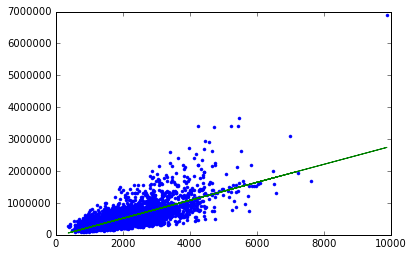

In [16]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', 
        test_data['sqft_living'], sqft_model.predict(test_data),'-')

In [17]:
# 단순 선형모형의 계수(또는 parameters)를 가져오는 방법 
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


## 데이터에 포함된 다른 features를 탐색하기

In [18]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 
               'sqft_lot', 'floors', 'zipcode']

In [19]:
sales['sqft_living'].show()

In [20]:
sales[my_features].show()

In [21]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

In [22]:
my_features_model= graphlab.linear_regression.create(train_data, target='price', features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.043623     | 3763208.270524     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

## 단순 모형과 my_features 모형과의 결과비교

In [23]:
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [24]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4143550.8825285914, 'rmse': 255191.02870527367}
{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}


In [25]:
# rmse 는 우리가 구한 모델로 집값을 구했을떄 얼마만큼의 차이가 나는지 직관적으로 알 수 있다. 

## 3개의 집에 대한 집값 예측하기

In [26]:
# 아래의 필터링 코드를 잘 알아두세요.
house1= sales[sales['id'] == '5309101200']

In [27]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [28]:
print house1['price']

[620000L, ... ]


In [29]:
print sqft_model.predict(house1)

[629584.8197281547]


In [30]:
print my_features_model.predict(house1)

[721918.9333272816]


## 비싼 좋은집에 대한 예측


In [31]:
house2 = sales[sales['id']=='1925069082']

<img src="http://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [32]:
print my_features_model.predict(house2)

[1446472.4690774996]


## 마지막 집(빌 게이츠의 집) 예측

In [33]:
bill_gates = {'bedrooms':[8], 
'bathrooms':[25], 
'sqft_living':[50000], 
'sqft_lot':[225000],
'floors':[4], 
'zipcode':['98039'], 
'condition':[10], 
'grade':[10],
'waterfront':[1],
'view':[4],
'sqft_above':[37500],
'sqft_basement':[12500],
'yr_built':[1994],
'yr_renovated':[2010],
'lat':[47.627606],
'long':[-122.242054],
'sqft_living15':[5000],
'sqft_lot15':[40000]}

In [34]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13749825.525717655]


In [35]:
print sqft_model.predict(graphlab.SFrame(bill_gates))

[14050778.487629209]


In [36]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [37]:
sales['price'].mean()

540088.1419053345

In [38]:
house3 = sales[sales['zipcode']=='98039']
house3['price'].max()

6885000L

In [41]:
a[a['zipcode']=='98039']

NameError: name 'a' is not defined

In [42]:
house5= sales[sales['sqft_living']<= 4000] and sales[sales['sqft_living']>= 2000]
house5

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1736800520,2015-04-03 00:00:00+00:00,662500,3,2.5,3560,9796,1,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
2524049179,2014-08-26 00:00:00+00:00,2000000,3,2.75,3050,44867,1,0
7137970340,2014-07-03 00:00:00+00:00,285000,5,2.5,2270,6300,2,0
3814700200,2014-11-20 00:00:00+00:00,329000,3,2.25,2450,6500,2,0
1794500383,2014-06-26 00:00:00+00:00,937000,3,1.75,2450,2691,2,0
1873100390,2015-03-02 00:00:00+00:00,719000,4,2.5,2570,7173,2,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0


In [43]:
house5['sqft_living'].max()

13540L

In [44]:
house5.show(view='Categorical')

In [34]:
my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

NameError: name 'advanced_features' is not defined

In [193]:
advanced_features =  [ 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition',
                      'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement',
                       'yr_renovated', 'lat', 'long', 'sqft_living15', 
                      'sqft_lot15']  

In [195]:
print my_features_model.evaluate(test_data)
print advanced_features_model.evaluate(test_data)

{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}
{'max_error': 3189089.121021446, 'rmse': 154481.47953751733}


In [194]:
advanced_features_model= graphlab.linear_regression.create(train_data, target='price', 
                            features=advanced_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 16

Number of unpacked features : 16

Number of coefficients    : 98

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.056950     | 4266664.645456     | 162491.085551 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [160]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [177]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4143550.8825285914, 'rmse': 255191.02870527367}
{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}


In [178]:
print sqft_model.evaluate(test_data)
print advanced_features_model.evaluate(test_data)

{'max_error': 4143550.8825285914, 'rmse': 255191.02870527367}
{'max_error': 3556849.413848093, 'rmse': 156831.11680191013}


In [179]:
print my_features_model.evaluate(test_data)
print advanced_features_model.evaluate(test_data)

{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}
{'max_error': 3556849.413848093, 'rmse': 156831.11680191013}


In [176]:
179542-156831

22711

In [9]:
house4= sales[(sales['sqft_living']>=2000) & (sales['sqft_living']<=4000)]

In [10]:
house4

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
1736800520,2015-04-03 00:00:00+00:00,662500,3,2.5,3560,9796,1,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
2524049179,2014-08-26 00:00:00+00:00,2000000,3,2.75,3050,44867,1,0
7137970340,2014-07-03 00:00:00+00:00,285000,5,2.5,2270,6300,2,0
3814700200,2014-11-20 00:00:00+00:00,329000,3,2.25,2450,6500,2,0
1794500383,2014-06-26 00:00:00+00:00,937000,3,1.75,2450,2691,2,0
1873100390,2015-03-02 00:00:00+00:00,719000,4,2.5,2570,7173,2,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
0461000390,2014-06-24 00:00:00+00:00,687500,4,1.75,2330,5000,1.5,0


In [11]:
float(house4.num_rows())/float(sales.num_rows())

0.4266413732475825

In [19]:
len(house4['sqft_living'])

9221

In [12]:
sales.num_rows()

21613

In [13]:
print advanced_features_model.predict(graphlab.SFrame(bill_gates))

NameError: name 'advanced_features_model' is not defined